# Importando as bibliotecas:

In [ ]:
# Importando as libs do pytorch:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets, transforms, models
from sklearn.model_selection import train_test_split

# Utilitários:
import matplotlib.pyplot as plt
import numpy as np
import time
import os

# Configurando o uso de GPU:

In [ ]:
# Confirmando que estamos utilizando GPU:
!nvidia-smi

Sun Apr 21 22:56:42 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Definindo o dispositivo:
if torch.cuda.is_available():
    print("GPU disponível. Usando GPU.")
    device = torch.device('cuda')
else:
    print("GPU não disponível. Usando CPU.")
    device = torch.device('cpu')

GPU disponível. Usando GPU.


# Baixando e separando o dataset:

In [ ]:
#Clonando um dataset rotulado sobre abelhas e formigas
!git clone https://github.com/jaddoescad/ants_and_bees.git

Cloning into 'ants_and_bees'...
remote: Enumerating objects: 408, done.
remote: Total 408 (delta 0), reused 0 (delta 0), pack-reused 408
Receiving objects: 100% (408/408), 45.03 MiB | 43.87 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [ ]:
transform = transforms.Compose([transforms.Resize((224,224)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                ])

training_dataset = datasets.ImageFolder('ants_and_bees/train', transform=transform)
validation_dataset = datasets.ImageFolder('ants_and_bees/val', transform=transform)

print(len(training_dataset))
print(len(validation_dataset))

244
153


In [ ]:
# Dividindo os dados em conjuntos de treinamento e validação usando train_test_split do sklearn
test_data, val_data = train_test_split(validation_dataset, test_size=0.5, random_state=42)

# Criando os DataLoaders para treinamento, validação e teste
train_loader = DataLoader(training_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

print("Tamanho do conjunto de dados de treinamento:", len(training_dataset))
print("Tamanho do conjunto de dados de validação:", len(val_data))
print("Tamanho do conjunto de dados de teste:", len(test_data))

Tamanho do conjunto de dados de treinamento: 244
Tamanho do conjunto de dados de validação: 77
Tamanho do conjunto de dados de teste: 76


# Visualizando algumas amostras:

In [ ]:
classes = ['ant', 'bee']

In [ ]:
# Função para converter de tensor para imagem:
def converter_imagem(tensor):
  imagem = tensor.clone().detach().numpy()
  imagem = imagem.transpose(1,2,0)
  imagem = (imagem - imagem.min()) / (imagem.max() - imagem.min())
  imagem = imagem.clip(0,1)
  return imagem

# Função para exibir várias imagens
def grade_imagens(train_loader, classes):
    fig = plt.figure(figsize=(6,4))
    fig.subplots_adjust(hspace=1)

    # Acessando o primeiro batch diretamente
    batch = next(iter(train_loader))
    imagens, rotulos = batch

    for idx in np.arange(4):
        ax = fig.add_subplot(2,2,idx+1)
        plt.imshow(converter_imagem(imagens[idx]))
        ax.set_title(f"Label: {classes[rotulos[idx].item()]}")
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()

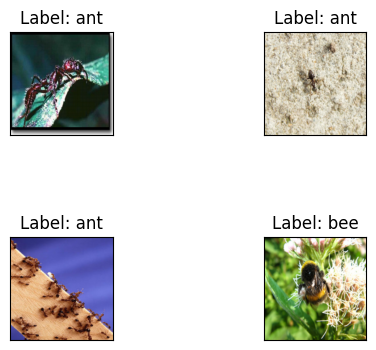

In [ ]:
grade_imagens(train_loader, classes)

# Baixando o modelo alexnet:

In [ ]:
# Carregando um modelo pronto
modelo = models.alexnet(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 87.8MB/s]


In [ ]:
print(modelo)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

# preparando o modelo para o treinamento no novo conjunto de dados:

In [ ]:
# Congelando a atualização de gradiente nas camadas de extração de features
for parametro in modelo.features.parameters():
  parametro.requires_grad = False

In [ ]:
# Atualizando o número de nós da camada de saída do nosso modelo pronto
n_entrada = modelo.classifier[6].in_features
nova_camada_final = nn.Linear(n_entrada, len(classes))
modelo.classifier[6] = nova_camada_final
modelo.to(device)
print(f"Novo númro de nós de saída: {modelo.classifier[6].out_features}")

Novo númro de nós de saída: 2


# Definindo nossas funções de treino, validação e teste:

In [ ]:
def Validacao(modelo, val_loader, criterio, device):
    modelo.eval()                                   # Define o modelo no modo de avaliação
    total_acertos = 0
    total_exemplos = 0
    epoch_loss = 0.0

    with torch.no_grad():                           # Desativa o cálculo de gradientes durante a validação
        for batch in val_loader:
            imagens, rotulos = batch
            imagens, rotulos = imagens.to(device), rotulos.to(device)
            saidas = modelo(imagens)
            loss = criterio(saidas, rotulos)
            epoch_loss += loss.item()

            _, previsoes = torch.max(saidas, 1)    # Obtém as previsões do modelo
            total_acertos += (previsoes == rotulos).sum().item()
            total_exemplos += rotulos.size(0)

    # Calcula a acurácia e a loss média para a época de validação
    avg_epoch_loss = epoch_loss / len(val_loader)
    accuracy = total_acertos / total_exemplos

    print(f'Loss de validação média: {avg_epoch_loss:.3f}, Acurácia de validação: {accuracy:.3f}\n')
    modelo.train()  # Retorna o modelo ao modo de treinamento
    return avg_epoch_loss, accuracy

In [ ]:
def Treinamento(epocas, modelo, train_loader, val_loader, criterio, otimizador, device):
  train_losses = []
  train_accuracies = []
  valid_losses = []
  valid_accuracies = []
  inicio = time.time()
  for epoca in range(epocas):
      epoch_loss = 0.0
      correct_predictions = 0
      total_predictions = 0                                         # Inicializa/zera a loss para a época
      for batch in train_loader:                                      # Iterando sobre cada conjunto de dados no loader
          imagens, rotulos = batch
          imagens, rotulos = imagens.to(device), rotulos.to(device)   # Move os dados para a GPU, se disponível
          otimizador.zero_grad()                                      # Zerando o valor dos gradientes para não acumular
          saidas = modelo(imagens)                                    # Realizando as predições com o modelo
          loss = criterio(saidas, rotulos)                            # Calculando o erro na predição com o nosso critério
          loss.backward()                                             # Propagando o erro pela rede
          otimizador.step()                                           # Atualizando os pesos com o nosso otimizador
          epoch_loss += loss.item()                                   # Acumula a loss para a época

          _, previsoes = torch.max(saidas, 1)  # Obtém as previsões do modelo
          correct_predictions += (previsoes == rotulos).sum().item()
          total_predictions += rotulos.size(0)

      # Calculando a média da loss para a época
      avg_train_loss = epoch_loss / len(train_loader)
      train_accuracy = correct_predictions / total_predictions

      # Exibindo a loss média para a época
      print(f'Época {epoca + 1}/{epocas}:\nLoss de treinamento média: {avg_train_loss:.3f}, Acurácia de treinamento: {train_accuracy:.3f}')

      # Realiza a validação após cada época de treinamento
      avg_valid_loss, val_accuracy = Validacao(modelo, val_loader, criterio, device)

      train_losses.append(avg_train_loss)
      valid_losses.append(avg_valid_loss)
      train_accuracies.append(train_accuracy)
      valid_accuracies.append(val_accuracy)

  fim = time.time()
  print(f"Treinamento concluído em {fim-inicio:.2f} segundos")
  return modelo, train_losses, valid_losses, train_accuracies, valid_accuracies

In [ ]:
# Teste o modelo no conjunto de teste
def Teste_modelo(modelo, test_loader):
  modelo.eval()                                                     # Configurando o modelo para modo de avaliação (não alterar nenhuma parâmetro)
  corretos = 0
  total = 0
  with torch.no_grad():                                             # Congela a atualização dos gradientes (não mexer nos valores dos gradientes)
      for batch in test_loader:
          imagens, rotulos = batch
          imagens, rotulos = imagens.to(device), rotulos.to(device) # Move os dados para a GPU, se disponível
          saidas = modelo(imagens)
          _, previsao = torch.max(saidas.data, 1)
          total += rotulos.size(0)
          corretos += (previsao == rotulos).sum().item()

  acuracia = corretos / total
  print(f'Acurácia no teste: {acuracia * 100:.2f}%')

# Definindo hiperparâmetros e realizando o treinamento:

In [ ]:
# Definindo uma taxa de aprendizado melhor já que é para adaptar um modelo
taxa_de_aprendizado = 0.0001

criterio = nn.CrossEntropyLoss()
otimizador = optim.Adam(modelo.parameters(), lr=taxa_de_aprendizado)

In [ ]:
# Definindo o número de épocas (vezes em que o modelo vai iterar sobre todo o conjunto de dados)
epocas = 5

# Treinamento do modelo
modelo, train_losses, valid_losses, train_accuracies, valid_accuracies = Treinamento(epocas, modelo, train_loader, val_loader, criterio, otimizador, device)

Época 1/5:
Loss de treinamento média: 0.513, Acurácia de treinamento: 0.754
Loss de validação média: 0.338, Acurácia de validação: 0.883

Época 2/5:
Loss de treinamento média: 0.226, Acurácia de treinamento: 0.902
Loss de validação média: 0.412, Acurácia de validação: 0.896

Época 3/5:
Loss de treinamento média: 0.129, Acurácia de treinamento: 0.955
Loss de validação média: 0.405, Acurácia de validação: 0.922

Época 4/5:
Loss de treinamento média: 0.076, Acurácia de treinamento: 0.967
Loss de validação média: 0.432, Acurácia de validação: 0.896

Época 5/5:
Loss de treinamento média: 0.038, Acurácia de treinamento: 0.996
Loss de validação média: 0.502, Acurácia de validação: 0.909

Treinamento concluído em 10.22 segundos


# Visualizando as métricas do treinamento e realizando o teste:

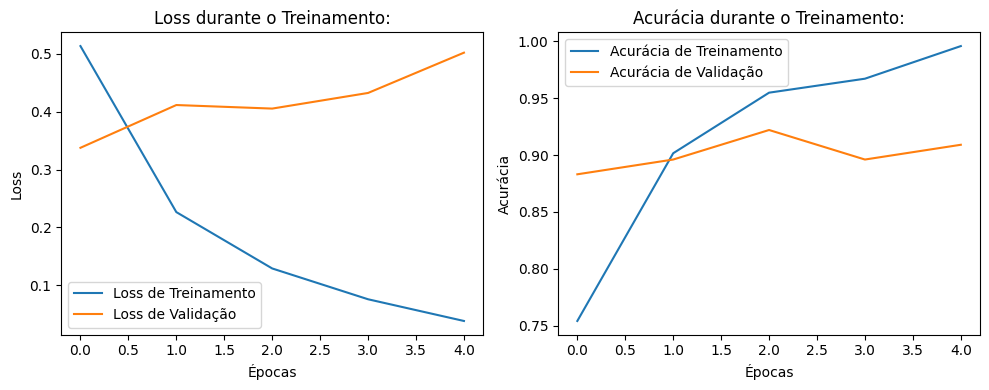

In [ ]:
# Definindo o tamanho da figura
plt.figure(figsize=(10, 4))

# Plotando as losses
plt.subplot(1, 2, 1)  # subplot com 1 linha, 2 colunas, este é o primeiro subplot
plt.plot(train_losses, label='Loss de Treinamento')
plt.plot(valid_losses, label='Loss de Validação')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Loss durante o Treinamento:')
plt.legend()

# Plotando as acurácias
plt.subplot(1, 2, 2)  # subplot com 1 linha, 2 colunas, este é o segundo subplot
plt.plot(train_accuracies, label='Acurácia de Treinamento')
plt.plot(valid_accuracies, label='Acurácia de Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.title('Acurácia durante o Treinamento:')
plt.legend()

# Mostrando os subplots
plt.tight_layout()
plt.show()

In [ ]:
Teste_modelo(modelo, test_loader)

Acurácia no teste: 86.84%


# Visualizando uma predição em um dado:

In [ ]:
def exibir_predicao(modelo_escolhido, dataset, classes):
    # Escolhendo uma imagem aleatória do conjunto de teste
    rand_idx = np.random.randint(len(dataset))
    image, label = dataset[rand_idx]

    # Adicionando uma dimensão para o lote
    image = image.unsqueeze(0)

    # Move a imagem para a GPU
    image = image.to(device)

    # Fazendo uma predição com o modelo_escolhido treinado
    modelo_escolhido.eval()
    with torch.no_grad():
        output = modelo_escolhido(image)  # Adiciona uma dimensão para o lote

    # Obtendo a classe prevista e a probabilidade associada
    predicted_probs = torch.softmax(output, dim=1)
    _, predicted_class = torch.max(output, 1)

    image = image.cpu().squeeze().numpy().transpose((1, 2, 0))  # Convertendo para o formato (224, 224, 3)
    image = (image - image.min()) / (image.max() - image.min()) # Normalizando os valores dos pixels para [0, 1]
    plt.imshow(image)
    plt.title(f'Real: {classes[label]}, Predição: {classes[predicted_class.item()]}')
    plt.show()
    print(f"Probabilidade: {(predicted_probs.squeeze()[predicted_class.item()].item())*100:.2f}%")

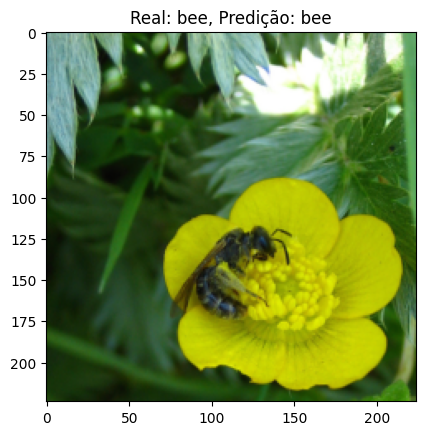

Probabilidade: 99.04%


In [ ]:
# Realiza predição e exibe
exibir_predicao(modelo, validation_dataset, classes)